In [1]:
%reset -s -f

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import os
import io
import sys
import time
import glob
import tabula
import autopep8
import contextlib
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

In [4]:
data_dir = "./data/*.pdf"
report_list = sorted(glob.glob(f"{data_dir}"))

## Process all quarterly reports in data directory

In [5]:
def proc_reports():
    cost_list = []

    for report in report_list:
        print(report)
        tables = tabula.read_pdf(report, pages=2, lattice=True, stream=True)
        tab_arr = tables[0].values
        tab_arr = tab_arr[(tab_arr[:, 0] == 'City of Toronto')
                          | (tab_arr[:, 0] == 'Brampton')]

        if tab_arr.shape[1] == 11:
            np.array([0, 0])[:, np.newaxis]
            tab_arr = np.insert(tab_arr, 1, [0, 0], axis=1)

        cost_array = tab_arr[:, [0, 5, 7, 9, 11]]
        
        cost_df = pd.DataFrame(cost_array, columns=['City', 'Bachelor', 'One-Bedroom','Two-Bedroom', 'Three-Bedroom']).astype('str')
        cost_df = cost_df.applymap(lambda x: x.replace('$','').replace(',',''))
        
        qr_yr = report.split('report_')[-1].replace('.pdf', '')
        qr, yr = qr_yr.strip().split('-')
        
        cost_df['year'] = f"{yr}_{qr}"
        cost_list.append(cost_df)

    return cost_list

In [6]:
with open(os.devnull, 'w') as devnull:
    with contextlib.redirect_stderr(devnull):
        cost_list = proc_reports()

./data\rental_report_Q1-2016.pdf
./data\rental_report_Q1-2017.pdf
./data\rental_report_Q1-2018.pdf
./data\rental_report_Q1-2019.pdf
./data\rental_report_Q1-2020.pdf
./data\rental_report_Q1-2021.pdf
./data\rental_report_Q2-2021.pdf
./data\rental_report_Q3-2021.pdf


In [7]:
for i in cost_list:
    display(i)

,City,Bachelor,One-Bedroom,Two-Bedroom,Three-Bedroom,year
0,Brampton,-,1365,1505,1575,2016_Q1
1,City of Toronto,1380,1701,2544,2963,2016_Q1


,City,Bachelor,One-Bedroom,Two-Bedroom,Three-Bedroom,year
0,Brampton,1200,1415,1681,1670,2017_Q1
1,City of Toronto,1510,1839,2570,3480,2017_Q1


,City,Bachelor,One-Bedroom,Two-Bedroom,Three-Bedroom,year
0,Brampton,-,1595,1776,1975,2018_Q1
1,City of Toronto,1662,2055,2836,3597,2018_Q1


,City,Bachelor,One-Bedroom,Two-Bedroom,Three-Bedroom,year
0,Brampton,1400,1747,2045,2175,2019_Q1
1,City of Toronto,1822,2186,2964,3997,2019_Q1


,City,Bachelor,One-Bedroom,Two-Bedroom,Three-Bedroom,year
0,Brampton,1650,1900,2225,nan,2020_Q1
1,City of Toronto,1851,2222,2943,nan,2020_Q1


,City,Bachelor,One-Bedroom,Two-Bedroom,Three-Bedroom,year
0,Brampton,-,1796,2162,2360,2021_Q1
1,City of Toronto,1403,1819,2504,3286,2021_Q1


,City,Bachelor,One-Bedroom,Two-Bedroom,Three-Bedroom,year
0,Brampton,1349,1834,2159,2383,2021_Q2
1,City of Toronto,1464,1887,2637,3454,2021_Q2


,City,Bachelor,One-Bedroom,Two-Bedroom,Three-Bedroom,year
0,Brampton,1400,1857,2190,2633,2021_Q3
1,City of Toronto,1707,2082,2885,3818,2021_Q3


In [8]:
names = [f"rep_{i}" for i in range(len(cost_list))]
names

['rep_0', 'rep_1', 'rep_2', 'rep_3', 'rep_4', 'rep_5', 'rep_6', 'rep_7']

In [9]:
# df = pd.concat(cost_list).set_index(['year'])
df = pd.concat(cost_list)

df = df.replace('-', np.nan)

for l in ['Bachelor','One-Bedroom','Two-Bedroom','Three-Bedroom']:
    df[l] = df[l].astype(float)

df

,City,Bachelor,One-Bedroom,Two-Bedroom,Three-Bedroom,year
0,Brampton,NaN,1365.0,1505.0,1575.0,2016_Q1
1,City of Toronto,1380.0,1701.0,2544.0,2963.0,2016_Q1
0,Brampton,1200.0,1415.0,1681.0,1670.0,2017_Q1
1,City of Toronto,1510.0,1839.0,2570.0,3480.0,2017_Q1
0,Brampton,NaN,1595.0,1776.0,1975.0,2018_Q1
1,City of Toronto,1662.0,2055.0,2836.0,3597.0,2018_Q1
0,Brampton,1400.0,1747.0,2045.0,2175.0,2019_Q1
1,City of Toronto,1822.0,2186.0,2964.0,3997.0,2019_Q1
0,Brampton,1650.0,1900.0,2225.0,NaN,2020_Q1
1,City of Toronto,1851.0,2222.0,2943.0,NaN,2020_Q1


In [10]:
types_list = ['Bachelor', 'One-Bedroom', 'Two-Bedroom', 'Three-Bedroom']

df_stacked_list = []

for typ in types_list:
    df1 = df[['City', 'year', typ]].copy()
    df1['apt_type'] = typ
    df1.rename({typ: 'price'}, axis=1, inplace=True)
    df_stacked_list.append(df1)

In [11]:
df2 = pd.concat(df_stacked_list)
df2.head()

,City,year,price,apt_type
0,Brampton,2016_Q1,NaN,Bachelor
1,City of Toronto,2016_Q1,1380.0,Bachelor
0,Brampton,2017_Q1,1200.0,Bachelor
1,City of Toronto,2017_Q1,1510.0,Bachelor
0,Brampton,2018_Q1,NaN,Bachelor


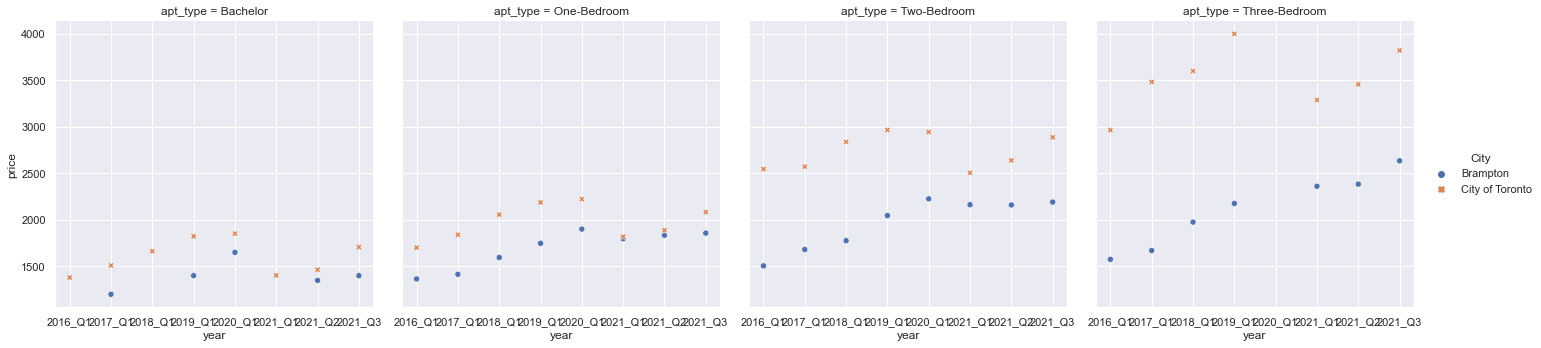

In [12]:
sns.set_theme()

# Create a visualization
sns.relplot(
    data=df2,
    x="year", y="price", col="apt_type",
    hue="City", style="City"
)

# Visualize Rent

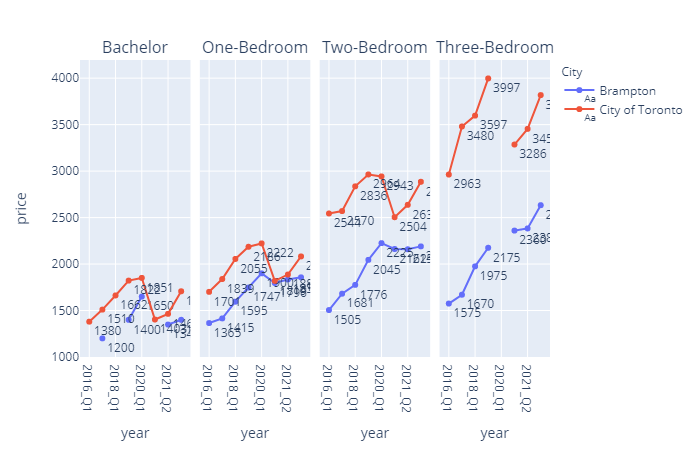

In [13]:
fig = px.line(df2, x="year", y="price", color = 'City', facet_col="apt_type",  text='price')
fig.update_traces(textposition="bottom right")

fig.update_layout(autosize=False, width=1700, height=700)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1],  font={'size':16}))
fig.show('png')

fig.write_image('rent_report_summary.pdf', width=1700, height=700)

# Save output to CSV

In [14]:
df_csv = df.set_index('year')
df_csv.to_csv('rent_comparisons.csv')

In [15]:
fig.write_image('aa4_3.pdf')

# FIN